In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
pd.set_option('display.max_columns', None)

In [3]:
bank_data=pd.read_csv("BankChurners.csv")

In [4]:
bank_data=bank_data.iloc[:,:-2]

In [5]:
#drooping Clientnum
bank_data.drop(columns="CLIENTNUM",inplace=True)


In [6]:
bank_data.head(1)

,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,5,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061


In [7]:
from sklearn.preprocessing import LabelEncoder
label_encoder=LabelEncoder()

In [8]:
x = bank_data.drop('Attrition_Flag', axis=1)
y = label_encoder.fit_transform(bank_data['Attrition_Flag'])


In [9]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [10]:
xtrain, xtest, ytrain, ytest = train_test_split(x,y, test_size=0.3,random_state=0)

In [11]:
def data_preprocessor(X,y):
        """Function to Prepocess the data """
        numeric_transformer = Pipeline(
                steps=[("imputer", SimpleImputer(strategy="median")), ("scaler", StandardScaler())]
            )

        categorical_transformer = OneHotEncoder(handle_unknown="ignore")
        preprocessor = ColumnTransformer(
                transformers=[
                    ("numeric", numeric_transformer, X.select_dtypes(np.number).columns.tolist()),
                    ("category", categorical_transformer,X.select_dtypes("object").columns.tolist()),
                ]
            )
        return preprocessor

In [12]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler,OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.feature_selection import SelectKBest,f_regression


In [13]:
preprocessor=data_preprocessor(xtrain,ytrain)

In [33]:
    
feature_selector = Pipeline(
                        steps=[("preprocessor", preprocessor),
                        ("feature", SelectKBest(f_regression,k=10))])
feature_selector.fit(xtrain,ytrain)
xopt=feature_selector.get_feature_names_out()
print(xopt)


ValueError: k should be <= n_features = 7; got 10. Use k='all' to return all features.

In [42]:
# x=bank_data[["Total_Relationship_Count","Months_Inactive_12_mon","Contacts_Count_12_mon","Total_Revolving_Bal","Total_Amt_Chng_Q4_Q1","Total_Trans_Amt","Total_Trans_Ct","Total_Ct_Chng_Q4_Q1","Avg_Utilization_Ratio","Gender"]]
x=bank_data[["Months_Inactive_12_mon","Contacts_Count_12_mon","Total_Revolving_Bal","Total_Trans_Amt","Total_Trans_Ct","Total_Ct_Chng_Q4_Q1","Avg_Utilization_Ratio"]]


In [43]:
xtrain, xtest, ytrain, ytest = train_test_split(x,y, test_size=0.3,random_state=0)
preprocessor=data_preprocessor(xtrain,ytrain)

In [44]:
from sklearn.ensemble import RandomForestClassifier

In [45]:

model_selector_randomforest = Pipeline(
                    steps=[("preprocessor", preprocessor),
                    ("classifier", RandomForestClassifier())]
                 
                )
model_selector_randomforest.fit(xtrain,ytrain)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('numeric',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['Months_Inactive_12_mon',
                                                   'Contacts_Count_12_mon',
                                                   'Total_Revolving_Bal',
                                                   'Total_Trans_Amt',
                                                   'Total_Trans_Ct',
                                                   'Total_Ct_Chng_Q4_Q1',
                                                   'Avg_Utilization_Ratio']),
                                                 ('category',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  [])])),
                ('classifier', RandomForestClassifier())])

In [46]:
ypred_randomforest=model_selector_randomforest.predict(xtest)

The Accuracy of the Model is 94.86673247778874


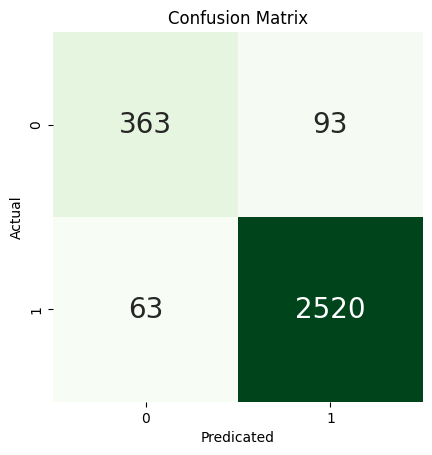

In [47]:
acuracy=accuracy_score(ytest,ypred_randomforest)
print(f"The Accuracy of the Model is {acuracy*100}")
cmaxt=confusion_matrix(ytest,ypred_randomforest,labels=[0,1])
sns_heat=sns.heatmap(cmaxt,cmap="Greens",annot=True, robust=True, cbar=False, square=True, annot_kws={"size": 20}, fmt="d")
plt.xlabel("Predicated")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

In [52]:

from sklearn.model_selection import train_test_split,GridSearchCV

In [53]:
param_grid_forest = {
    'classifier__n_estimators': [50,80,120,130,150],
    'classifier__criterion': ["gini","entropy","log_loss"],
    'classifier__min_samples_leaf': [1, 2, 3, 4],
    'classifier__max_depth': [1,2,3,5,6,7,8],
    'classifier__max_features': ["sqrt", "log2", None]
}
grid_search_randomforest = GridSearchCV(model_selector_randomforest, param_grid_forest, cv=5, verbose=0, n_jobs=-1)
grid_search_randomforest.fit(xtrain, ytrain)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('numeric',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer(strategy='median')),
                                                                                         ('scaler',
                                                                                          StandardScaler())]),
                                                                         ['Months_Inactive_12_mon',
                                                                          'Contacts_Count_12_mon',
                                                                          'Total_Revolving_Bal',
                                                                          'Total_Trans_Amt',
                                                                          'Total_Trans_Ct',
                                                                          'Total_Ct_Chng_Q4_Q1',
                                                                          'Avg_Utilization_Ratio']),
                                                                        ('category',
                                                                         OneHotEncoder(handle_unknown='ignore'),
                                                                         [])])),
                                       ('classifier',
                                        RandomForestClassifier())]),
             n_jobs=-1,
             param_grid={'classifier__criterion': ['gini', 'entropy',
                                                   'log_loss'],
                         'classifier__max_depth': [1, 2, 3, 5, 6, 7, 8],
                         'classifier__max_features': ['sqrt', 'log2', None],
                         'classifier__min_samples_leaf': [1, 2, 3, 4],
                         'classifier__n_estimators': [50, 80, 120, 130, 150]})

In [54]:
ypred_randomforest=grid_search_randomforest.predict(xtest)

The Accuracy of the Model is 94.60348798947022


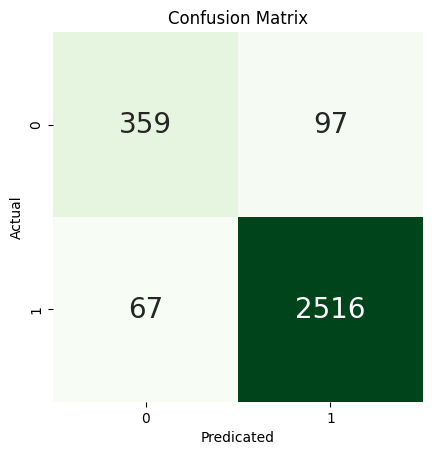

In [55]:
acuracy=accuracy_score(ytest,ypred_randomforest)
print(f"The Accuracy of the Model is {acuracy*100}")
cmaxt=confusion_matrix(ytest,ypred_randomforest,labels=[0,1])
sns_heat=sns.heatmap(cmaxt,cmap="Greens",annot=True, robust=True, cbar=False, square=True, annot_kws={"size": 20}, fmt="d")
plt.xlabel("Predicated")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

In [58]:
bank_data.head(1)

,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,5,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061


In [74]:
bank_data["Total_Ct_Chng_Q4_Q1"].max()

3.714

In [51]:
custom_output=[{
   
    "Months_Inactive_12_mon":1,
    "Contacts_Count_12_mon":3,
    "Total_Revolving_Bal":777,
    "Total_Trans_Amt":1144,
    # "Total_Amt_Chng_Q4_Q1":1.335,
    "Total_Trans_Ct":42,
    "Total_Ct_Chng_Q4_Q1":1.625,
    "Avg_Utilization_Ratio":0.65,


}]
output=pd.DataFrame(custom_output)
model_selector_randomforest.predict(output)

array([1])

In [56]:
import joblib
joblib.dump(model_selector_randomforest, "new_model.jb")

['new_model.jb']